In [1]:
# Q1
movement = 100
x_max = 101
y_max = 103
with open("input.txt") as f:
    lines = [line.strip().split(" ") for line in f.readlines()]
    for l in lines:
        l[0] = l[0][2:].split(",")
        l[1] = l[1][2:].split(",")
        l[0][0] = (int(l[0][0]) + int(l[1][0]) * movement % x_max) % x_max
        l[0][1] = (int(l[0][1]) + int(l[1][1]) * movement % y_max) % y_max


def quadrant_check():
    left_top = 0
    left_bottom = 0
    right_top = 0
    right_bottom = 0
    x_bound = x_max // 2
    y_bound = y_max // 2
    for l in lines:
        x, y = l[0]
        if y < y_bound:
            if x < x_bound:
                left_top += 1
            elif x > x_bound:
                right_top += 1
        elif y > y_bound:
            if x < x_bound:
                left_bottom += 1
            elif x > x_bound:
                right_bottom += 1
    return left_top * left_bottom * right_top * right_bottom


print(quadrant_check())

222208000


In [35]:
# Q2
x_max = 101
y_max = 103
with open("input.txt") as f:
    lines = [line.strip().split(" ") for line in f.readlines()]
    for l in lines:
        l[0] = l[0][2:].split(",")
        l[1] = l[1][2:].split(",")
        l[0][0] = int(l[0][0])
        l[0][1] = int(l[0][1])
        l[1][0] = int(l[1][0])
        l[1][1] = int(l[1][1])

consecutive_tiles_bound = 7
for i in range(x_max * y_max):
    tile = [[0]*x_max for _ in range(y_max)]
    for l in lines:
        l[0][0] = (l[0][0] + l[1][0]) % x_max
        l[0][1] = (l[0][1] + l[1][1]) % y_max
        tile[l[0][1]][l[0][0]] = 1
    consecutive_check = False
    for t in tile:
        consecutive_count = 0
        for k in range(len(t)):
            if t[k] == 0:
                is_consecutive = False
                consecutive_count = 0
            if t[k] == 1:
                if not is_consecutive:
                    is_consecutive = True
                consecutive_count += 1
            if consecutive_count == consecutive_tiles_bound:
                consecutive_check = True
    if consecutive_check:
        print(i)
        for t in tile:
            print("".join([str(i) for i in t]))

3784
00000000000000000000000001000001010100001000000000000000001000000000000000000000000000000000000000000
00000000000000100000000000000100000011000000000001000000000000000000000000000000000000000000000000000
00000000000000000001000011000100000001000000000001000000000000000000000000000000000000000000000000000
00000000000000000000000000000000010001100000000001000000000000000000100000000000000000000000001000000
00000000000000000000000000000000000100000000000000000000000000000000100000000000000000000000000000000
00000000010000000001000000000001001000100000000000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000001000000000000001000000000000000000000000000000000000000000000000000
00000010000000000000000010000000001000011000000000000000000000000000000000000000000000010000000000000
00000000000000000001010000000000000000000000000100000000000000000000000000000000000000000000000001000
00000000000000000001000000000000001000000100000000000000000000000000000000000

In [2]:
x_max = 101
y_max = 103
with open("input.txt") as f:
    lines = [line.strip().split(" ") for line in f.readlines()]
    for l in lines:
        l[0] = l[0][2:].split(",")
        l[1] = l[1][2:].split(",")
        l[0][0] = int(l[0][0])
        l[0][1] = int(l[0][1])
        l[1][0] = int(l[1][0])
        l[1][1] = int(l[1][1])

tiles = []
for i in range(x_max * y_max):
    tile = [[0] * x_max for _ in range(y_max)]
    for l in lines:
        l[0][0] = (l[0][0] + l[1][0]) % x_max
        l[0][1] = (l[0][1] + l[1][1]) % y_max
        tile[l[0][1]][l[0][0]] = 1
    tiles.append(tile)

IntSlider(value=50, description='Speed (ms/frame)', max=500, min=10, step=10)

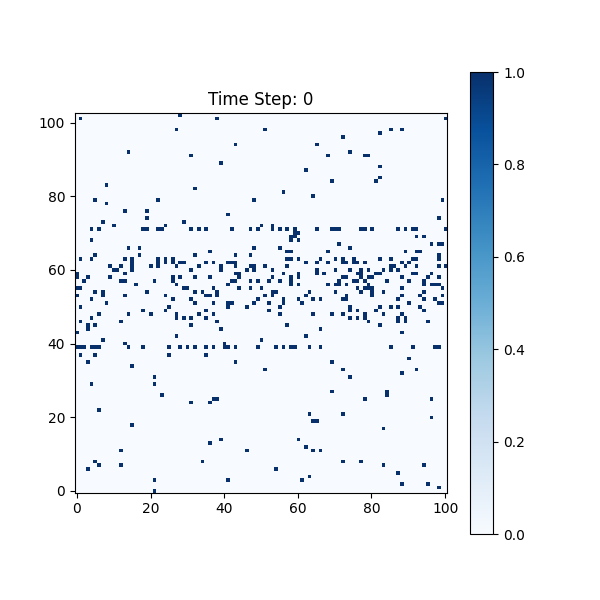

In [3]:
%matplotlib widget

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import ipywidgets as widgets
from IPython.display import display



# 1. Create the figure and imshow object.
fig, ax = plt.subplots(figsize=(6, 6))

im = ax.imshow(tiles[0], cmap="Blues", origin="lower", animated=True)
fig.colorbar(im, ax=ax)

ax.set_title("Time Step: 0")

# 2. Define init and update functions for FuncAnimation.
def init():
    """Initialize the image with the first frame."""
    im.set_array(tiles[0])
    ax.set_title("Time Step: 0")
    return (im,)

def update(frame):
    """Update the image to the given frame index."""
    im.set_array(tiles[frame])
    ax.set_title(f"Time Step: {frame}")
    return (im,)

# 3. Create the FuncAnimation with a default interval (speed).
ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(tiles),
    init_func=init,
    interval=10,  # default interval in ms
    blit=True
)

# 4. Create a slider to control the animation speed dynamically.
speed_slider = widgets.IntSlider(
    value=50,         # match the default interval
    min=10,            # minimum speed (fastest animation)
    max=500,          # maximum speed (slowest animation)
    step=10,
    description="Speed (ms/frame)"
)

def on_slider_change(change):
    if change["name"] == "value":
        new_interval = change["new"]
        ani.event_source.interval = new_interval

speed_slider.observe(on_slider_change, names="value")

# 5. Create Play/Pause buttons to manually start/stop the animation.
play_button = widgets.Button(description="Play")
pause_button = widgets.Button(description="Pause")

def on_play_click(_):
    ani.event_source.start()   # resumes animation

def on_pause_click(_):
    ani.event_source.stop()    # pauses animation

play_button.on_click(on_play_click)
pause_button.on_click(on_pause_click)

# 6. Display the widgets (slider + buttons).
display(speed_slider, widgets.HBox([play_button, pause_button]))

# 7. Show the figure.
plt.show()
